The following MIT license only applies to the code, and not to the text and images.

# MIT License

Copyright (c) 2024 Taha Selim, Alain Chancé, MolKet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

|||
|-|-|
|**Author:** |Taha Selim and Alain Chancé|
|**Date:** |July 10th, 2024|
|**Tutorial:** |**Version 0** <br/>  ML wavefunction generator for a diatomic system givin a vibrational frequency and a intermolecular 1D potential. |
|**MolKet's package version:** |0.2|
|**Contacts:** | Taha Selim, tahaselim@molket.io 
|             | Alain Chancé, alain.chance@gmail.com|


In [94]:

# get julia version 
versioninfo()

Julia Version 1.11.2
Commit 5e9a32e7af2 (2024-12-01 20:02 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin24.0.0)
  CPU: 8 × Apple M1 Pro
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, apple-m1)
Threads: 1 default, 0 interactive, 1 GC (on 6 virtual cores)
Environment:
  DYLD_FALLBACK_LIBRARY_PATH = /Users/tahaselim/.julia/artifacts/73674ecf50f470c8706f958c9b6b1c5f2106ad71/lib:/Users/tahaselim/.julia/artifacts/06b4eca2da96ea8e2e910741b815dd66bbee8baa/lib:/Users/tahaselim/.julia/artifacts/5b90ad21b4b1af3a9446241fb5afe3e3b3eda941/lib:/Users/tahaselim/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/lib/julia:/Users/tahaselim/.julia/artifacts/d3baa6c3df75e116ea8238482f865f35ff156810/lib:/Users/tahaselim/.julia/artifacts/9410bad2635eda2239b4a72ba4316c4aa8f5b76e/lib:/Users/tahaselim/.julia/artifacts/3b568c51fbf75bfe59ac69d26b176034fdd63ebb/lib:/Users/tahaselim/.julia/artifacts/21209a2ac399ce693d73daf1aa8d670fbc84d70f/lib:/Users/ta

In [95]:
# Load MolKet's modules and libraries

include("../molket.jl")


Load quantum gates constructor
Load Tensor module: QTensor.jl


Load quantum gates constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl


Load quantum gates constructor
Load quantum_circuit constructor
Load quantum gates constructor


Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum_circuit constructor


Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load ascii 2Darray


In [3]:
# using Libdl

In [96]:
# test the shared object 
#Libdl.dlopen("HeCO2potv2.so")

Libdl.dlopen("../lib_potential/HeCO2potv2.so")


Ptr{Nothing} @0x00000000913de800

In [97]:
# Inputs
R0 = 5.7       # CO2-He distance
QQ = 0.0       # Dimensionless normal coordinate
theta = 90.0    # Angle with z-axis
phi = 0      # Angle in xy-plane
vpot = Ref{Cdouble}(0.0)  # Output: Potential energy

# Call the subroutine
ccall((:heco2potv2_, "../lib_potential/HeCO2potv2.so"), Cvoid, 
      (Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}),
      R0, QQ, theta, phi, vpot)

# Print the result
println("Calculated potential: ", vpot[]/cm1)


Calculated potential: 44.11877388093571


In the following cell, we will test the potential on a given grid of points in $Q$, $R$, $\theta$ and $\phi$ and plot the potential.

In [98]:
# Retrieve reference data from file

filename = "../lib_potential/Vpot_heco2_refdata.dat"
 pot_data = read_mixed_data(filename)
 println(pot_data)

Any[Any[1.0, 6.39048431790434, 0.852520652115345, 1.63644068089431, 5.85072821410867, -38.77195013853806, "-0.3877195013853705E+02********************"], Any[2.0, 8.79615684668534, -0.465971812605858, 0.367309045633237, 5.59910107307967, -17.52061247339478, "-0.1752061247339592E+02********************"], Any[3.0, 9.54409375670366, 1.96406215429306, 1.16891764042022, 4.43707493105516, -4.648651061978663, "-0.4648651061978669E+01********************"], Any[4.0, 10.2592325580772, -1.1046179458499, 1.08604020058505, 1.47065720263843, -2.278837065922246, "-0.2278837065922187E+01********************"], Any[5.0, 11.8822548517492, 0.409278564155102, 1.79545059535835, 0.345342112062281, -0.1453827988383787, "-0.1453827988382038E+00********************"], Any[6.0, 13.4812615595292, -1.93289755284786, 2.93594742258905, 3.52478135752025, -0.004326054469524383, "-0.4326054469093559E-02********************"], Any[7.0, 16.1922277247068, -0.481204651296139, 0.962067770990025, 2.43790844202072, 9.88781

In [99]:
# write a code to loop over R as second column, Q as third column, theta as fourth column and phi as fifth column and calculate the potential energy for each set of values

# create a matrix of R, Q, theta, phi, vpot_ref and vpot
Vpot_mat = def_matrix(length(pot_data), 6)

for i in 1:length(pot_data)
    R0 = pot_data[i][2]
    QQ = pot_data[i][3]
    theta = pot_data[i][4]
    phi = pot_data[i][5]
    vpot_ref = pot_data[i][6]
    vpot = Ref{Cdouble}(0.0)  # Output: Potential energy

    # Call the subroutine
    ccall((:heco2potv2_, "HeCO2potv2.so"), Cvoid,
          (Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}),
          R0, QQ, theta, phi, vpot)
    
    rel_error = abs(vpot[]/cm1 - vpot_ref)/abs(vpot_ref)

    # Print the result
    #println("Calculated potential: ", vpot[]/cm1)

    # create a matrix of R, Q, theta, phi, vpot_ref and vpot
    println("R0 = ", R0, " QQ = ", QQ, " theta = ", theta, " phi = ", 
    phi, " vpot_ref = ", vpot_ref, " vpot = ", vpot[]/cm1, " relative error = ", rel_error)

end

R0 = 6.39048431790434 QQ = 0.852520652115345 theta = 1.63644068089431 phi = 5.85072821410867 vpot_ref = -38.77195013853806 vpot = -38.77195013853807 relative error = 1.8326205754965206e-16
R0 = 8.79615684668534 QQ = -0.465971812605858 theta = 0.367309045633237 phi = 5.59910107307967 vpot_ref = -17.52061247339478 vpot = -17.520612473394785 relative error = 2.0277337246031386e-16
R0 = 9.54409375670366 QQ = 1.96406215429306 theta = 1.16891764042022 phi = 4.43707493105516 vpot_ref = -4.648651061978663 vpot = -4.648651061978663 relative error = 0.0
R0 = 10.2592325580772 QQ = -1.1046179458499 theta = 1.08604020058505 phi = 1.47065720263843 vpot_ref = -2.278837065922246 vpot = -2.2788370659222457 relative error = 1.9487536712956684e-16
R0 = 11.8822548517492 QQ = 0.409278564155102 theta = 1.79545059535835 phi = 0.345342112062281 vpot_ref = -0.1453827988383787 vpot = -0.14538279883837868 relative error = 1.909137520903325e-16
R0 = 13.4812615595292 QQ = -1.93289755284786 theta = 2.93594742258905

Let's make some cuts in the potential to see the effect of the different parameters. First, let's evaluate the potential and make a surface plot of the potential in $\text{cm}^{-1}$ as a function of $R$ and $\theta$ while keeping $Q=0$ and $\phi=0$ constant.

In [100]:
# make a surface plot of R and theta with vpot as the z-axis
# First, R gird 
R = collect(4.0:0.1:6.0)
# Second, theta grid
theta = collect(0.0:10.0:180.0)
# Third, create a matrix of R and theta
Vpot_Rtheta = def_matrix(length(R),length(theta))

# create a loop to call the potential subroutine 

for i in 1:length(R)
    for j in 1:length(theta)
        R0 = R[i]
        QQ = 0.0
        theta0 = theta[j]
        phi = 0
        vpot = Ref{Cdouble}(0.0)  # Output: Potential energy

        # Call the subroutine
        ccall((:heco2potv2_, "HeCO2potv2.so"), Cvoid,
              (Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}),
              R0, QQ, theta0, phi, vpot)
        
        Vpot_Rtheta[i,j] = vpot[]/cm1
    end
end

In [101]:
# print the matrix
println(Vpot_Rtheta)

Union{Float64, Int64, ComplexF64}[44576.459114629746 30936.580208138254 3150.4172984085903 1528.1087549717122 10849.95923441141 43509.18441531382 43404.71434576135 9203.526411565326 1343.2094674568227 3838.674604635324 34786.38060647703 44483.265809197386 26783.970299476205 2636.1957612505794 1707.328226737813 12944.645326105514 43561.438525155 43027.95308317503 7860.354401825917; 43551.80504763278 26449.960485768923 2603.244276318581 1187.5705993034564 9084.46308754159 43564.66239796206 42843.35235715779 7678.883371695069 1050.9400947720746 3159.442259797886 30309.169063210076 43589.75215640774 22596.119467056706 2177.77272737582 1332.3262994519494 10841.067138251337 43874.45404668239 41575.81438169739 6518.471398553053; 42577.970237786496 22050.744587898702 2169.53433433822 889.0640693557775 7655.057402800537 42614.20254232789 41188.301660829915 6405.339580964621 806.115681588497 2595.4006915608716 25652.860604717865 42695.857009700565 18707.390207673358 1823.7040330815075 1000.45416

Now, let's create a surface plot. 

Let's create 2D plots of the potential.

In [102]:
# generate 1D plot, Vpot vs R for theta = 90, phi = 0, and Q = 0
R = collect(4.0:0.1:6.0)
QQ = 0.0
theta = 90.0
phi = 0
theta_rad = theta*pi/180
phi_rad = phi*pi/180
Vpot_R = def_matrix(length(R),1)

for i in 1:length(R)
    R0 = R[i]
    vpot = Ref{Cdouble}(0.0)  # Output: Potential energy

    # Call the subroutine
    ccall((:heco2potv2_, "HeCO2potv2.so"), Cvoid,
          (Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}),
          R0, QQ, theta_rad, phi_rad, vpot)
        
    Vpot_R[i] = vpot[]/cm1
end

# create another cut at theta = 0 
Vpot_R_theta0 = def_matrix(length(R),1)

for i in 1:length(R)
    R0 = R[i]
    vpot = Ref{Cdouble}(0.0)  # Output: Potential energy

    # Call the subroutine
    ccall((:heco2potv2_, "HeCO2potv2.so"), Cvoid,
          (Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}),
          R0, QQ, 0.0, phi_rad, vpot)
        
    Vpot_R_theta0[i] = vpot[]/cm1
end



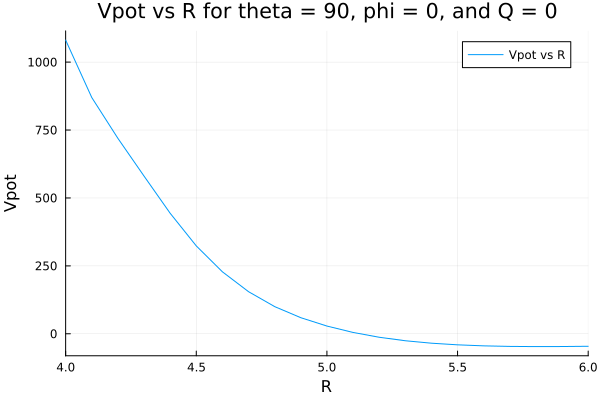

In [103]:
# create a plot
plot(R, Vpot_R, label="Vpot vs R", xlabel="R", ylabel="Vpot", 
# add x limits 
xlims = (4, 6.0),
# add y limits
#ylims = (-0.5, 0.5),
title="Vpot vs R for theta = 90, phi = 0, and Q = 0")

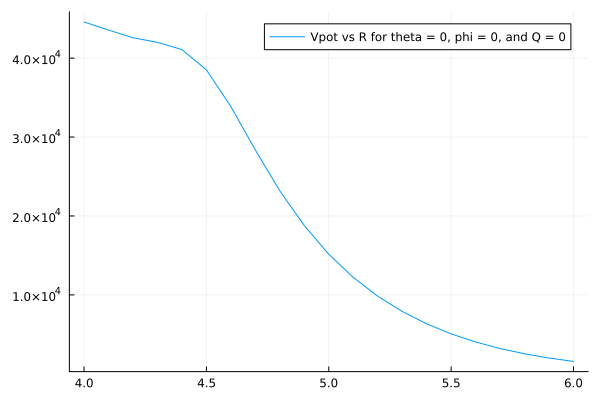

In [104]:
#plot theta = 0 
plot(R, Vpot_R_theta0, label="Vpot vs R for theta = 0, phi = 0, and Q = 0")

In [107]:
function grid1D_heco2potv2(;var="R", step::Float64=0.1, 
                           lower::Float64=4.0, upper::Float64=6.0)
    if var == "R"
        grid = collect(lower:step:upper)
    elseif var == "Q"
        grid = collect(lower:step:upper)
    elseif var == "theta"
        grid = collect(lower:step:upper)
    elseif var == "phi"
        grid = collect(lower:step:upper)
    else
        println("Invalid variable")
    end
    return grid
end


grid1D_heco2potv2 (generic function with 2 methods)

In [108]:
# test the function grid1D_heco2potv2
R = grid1D_heco2potv2(var="R", step=0.1, lower=4.0, upper=6.0)

21-element Vector{Float64}:
 4.0
 4.1
 4.2
 4.3
 4.4
 4.5
 4.6
 4.7
 4.8
 4.9
 5.0
 5.1
 5.2
 5.3
 5.4
 5.5
 5.6
 5.7
 5.8
 5.9
 6.0

In [ ]:
function plot1D_heco2potv2(;var="R", step::Float64=0.1, lower::Float64=4.0, upper::Float64=6.0,
                                    fixed_R::Float64=0.0, fixed_QQ::Float64=0.0, fixed_theta::Float64=0.0, fixed_phi::Float64=0.0,unitcm1::Bool=true)
# Function plot1D_heco2potv2 to create 1D plot of a specific coordinate of the 4D potential energy surface of He-CO2 complex over the bend vibrational mode.
# The potential energy is calculated using the HeCO2potv2 subroutine.
# The function takes the following arguments:
# var: a string that specifies the coordinate to be plotted. It can be "R", "Q", "theta", or "phi". Default is "R".
# step: a float that specifies the step size of the grid. Default is 0.1.
# lower: a float that specifies the lower bound of the grid. Default is 4.0.
# upper: a float that specifies the upper bound of the grid. Default is 6.0.
# fixed_R: a float that specifies the fixed value of R. Default is 0.0.
# fixed_QQ: a float that specifies the fixed value of Q. Default is 0.0.
# fixed_theta: a float that specifies the fixed value of theta. Default is 0.0.
# fixed_phi: a float that specifies the fixed value of phi. Default is 0.0.
# unitcm1: a boolean that specifies whether the potential energy is in cm^-1. Default is true.
# so_filepath: a string that specifies the path to the shared object file. Default is "HeCO2potv2.so".
# so_subroutine: a string that specifies the name of the subroutine in the shared object file. Default is "heco2potv2_".
    # path 

    # create a grid
    grid = grid1D_heco2potv2(var=var, step=step, lower=lower, upper=upper)
    # create a matrix to store the potential energy
    Vpot = def_matrix(length(grid),1)
    # loop over the grid
    if var == "R"
        QQ = fixed_QQ
        theta_rad = fixed_theta*pi/180
        phi_rad = fixed_phi*pi/180
        for i in 1:length(grid)
            R0 = grid[i]
            vpot = Ref{Cdouble}(0.0)  # Output: Potential energy
            # Call the subroutine
            ccall((:heco2potv2_, "HeCO2potv2.so"), Cvoid,
                  (Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}),
                  R0, QQ, theta_rad, phi_rad, vpot)
            Vpot[i] = vpot[]
        end
    elseif var == "Q"
        theta_rad = fixed_theta*pi/180
        phi_rad = fixed_phi*pi/180
        for i in 1:length(grid)
            QQ = grid[i]
            vpot = Ref{Cdouble}(0.0)  # Output: Potential energy
            # Call the subroutine
            ccall((:heco2potv2_, "HeCO2potv2.so"), Cvoid,
                  (Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}),
                  fixed_R, QQ, theta_rad, phi_rad, vpot)
            Vpot[i] = vpot[]
        end
    elseif var == "theta"
        phi_rad = fixed_phi*pi/180
        for i in 1:length(grid)
            R0 = R
            QQ = Q
            theta_rad = grid[i]*pi/180
            phi_rad = phi*pi/180
            vpot = Ref{Cdouble}(0.0)  # Output: Potential energy
            # Call the subroutine
            ccall((:heco2potv2_, "HeCO2potv2.so"), Cvoid,
                  (Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}),
                  fixed_R, fixed_QQ, theta_rad, phi_rad, vpot)
            Vpot[i] = vpot[]
        end
    elseif var == "phi"
        theta = fixed_theta*pi/180
        for i in 1:length(grid)
            R0 = R
            QQ = Q
            theta_rad = theta*pi/180
            phi = grid[i]*pi/180
            vpot = Ref{Cdouble}(0.0)  # Output: Potential energy
            # Call the subroutine
            ccall((:heco2potv2_, "HeCO2potv2.so"), Cvoid,
                  (Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}, Ref{Cdouble}),
                  fixed_R, fixed_QQ, theta_rad, phi_rad, vpot)
            Vpot[i] = vpot[]
        end
    end
    if unitcm1 == true
        Vpot = Vpot/cm1
    end
    return grid, Vpot
end # end of the function plot1D_heco2potv2

plot1D_heco2potv2 (generic function with 1 method)

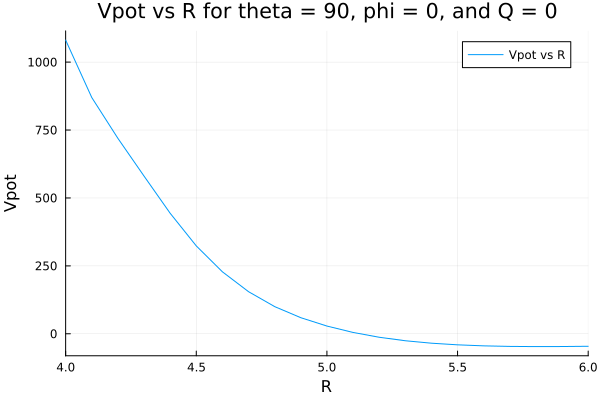

In [128]:
# test 
R, Vpot = plot1D_heco2potv2(var="R", step=0.1, lower=4.0, upper=6.0, fixed_R=5.7, fixed_QQ=0.0, fixed_theta=90.0, fixed_phi=0.0, unitcm1=true)

# create a plot
plot(R, Vpot, label="Vpot vs R", xlabel="R", ylabel="Vpot",
# add x limits
xlims = (4, 6.0),
# add y limits
#ylims = (-0.5, 0.5),
title="Vpot vs R for theta = 90, phi = 0, and Q = 0")


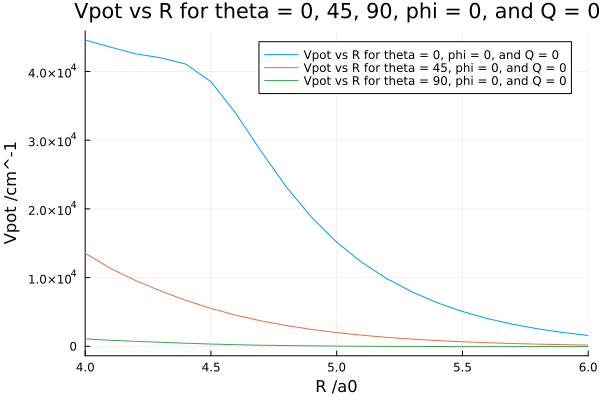

In [133]:
# create 3 subplots of vpot vs. R at theta=0,45,90 , phi = 0, QQ = 0
R, Vpot_theta0 = plot1D_heco2potv2(var="R", step=0.1, lower=4.0, upper=6.0, fixed_R=5.7, fixed_QQ=0.0, fixed_theta=0.0, fixed_phi=0.0, unitcm1=true)
R, Vpot_theta45 = plot1D_heco2potv2(var="R", step=0.1, lower=4.0, upper=6.0, fixed_R=5.7, fixed_QQ=0.0, fixed_theta=45.0, fixed_phi=0.0, unitcm1=true)
R, Vpot_theta90 = plot1D_heco2potv2(var="R", step=0.1, lower=4.0, upper=6.0, fixed_R=5.7, fixed_QQ=0.0, fixed_theta=90.0, fixed_phi=0.0, unitcm1=true)

# create a plot
plot(R, Vpot_theta0, label="Vpot vs R for theta = 0, phi = 0, and Q = 0", xlabel="R /a0", ylabel="Vpot /cm^-1",
# add x limits
xlims = (4, 6.0),
# add y limits
#ylims = (-0.5, 0.5),
title="Vpot vs R for theta = 0, 45, 90, phi = 0, and Q = 0")

plot!(R, Vpot_theta45, label="Vpot vs R for theta = 45, phi = 0, and Q = 0")
plot!(R, Vpot_theta90, label="Vpot vs R for theta = 90, phi = 0, and Q = 0")
